# Crop and Fertilizer Recommadation System using Maachine Learning
# By Nivetha D [ID-INTERNSHIP_1733138870674d99b64cb4b]

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop = pd.read_csv("Dataset/Crop_recommendation.csv")

In [3]:
crop.head()  # Returns the first 5 rows

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.tail()  # Returns the last 5 rows

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop.shape  # Returns rows and columns

(2200, 8)

In [6]:
crop.info()  # Displays information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# Checking for missing values
crop.isnull()  # Check for missing values
crop.isnull().sum()  # Returns the sum of missing values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# Checking for duplicated values
crop.duplicated()  # Check for duplicate rows
crop.duplicated().sum()  # Returns the sum of duplicated rows


np.int64(0)

In [9]:
# Descriptive statistics
crop.describe()  # To check the statistics of the dataset



,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
# Viewing column names
crop.columns  # Shows all the column names



Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
# Analyzing the distribution of the target column
crop['label'].value_counts()  # Check the feature of specific columns

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

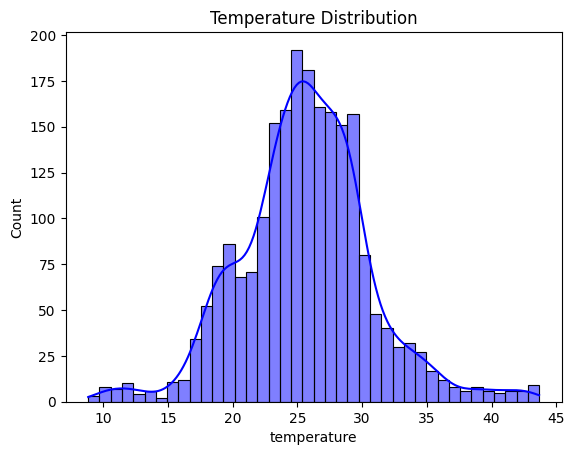

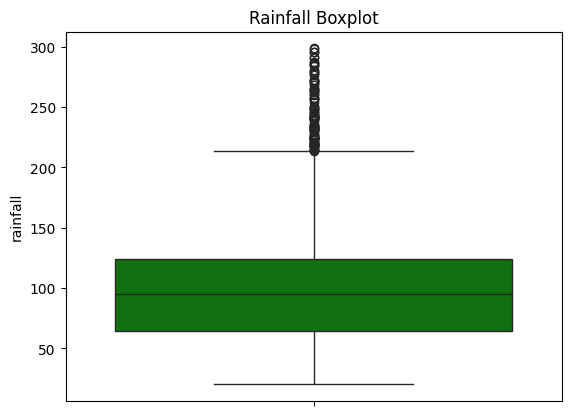

In [12]:
sns.histplot(crop['temperature'], kde=True, color='blue')
plt.title('Temperature Distribution')
plt.show()

sns.boxplot(crop['rainfall'], color='green')
plt.title('Rainfall Boxplot')
plt.show()


C:\Users\Nivetha\AppData\Local\Temp\ipykernel_3308\673104255.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=crop['label'], palette='viridis')


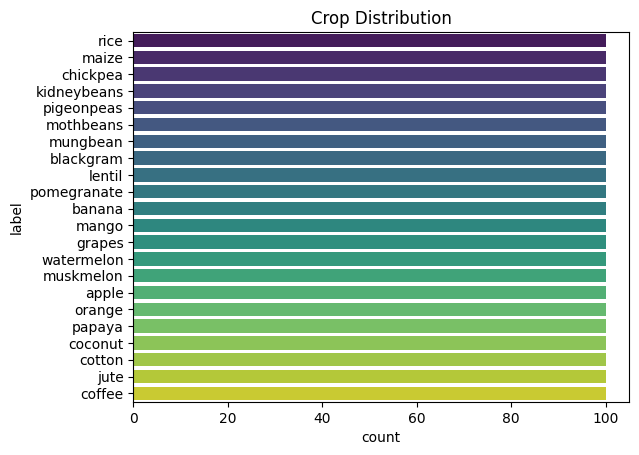

In [13]:
sns.countplot(y=crop['label'], palette='viridis')
plt.title('Crop Distribution')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop[features] = scaler.fit_transform(crop[features])


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
crop['label'] = encoder.fit_transform(crop['label'])


<Axes: >

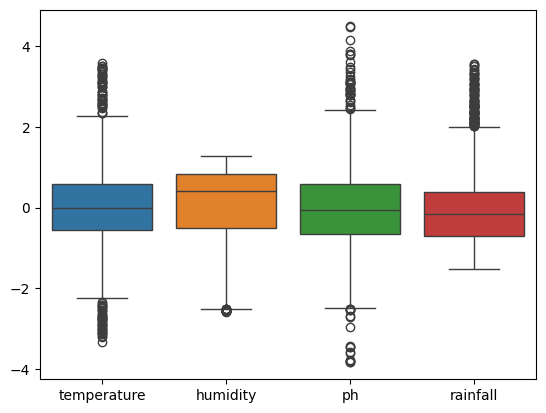

In [16]:
import seaborn as sns
sns.boxplot(data=crop[['temperature', 'humidity', 'ph', 'rainfall']])


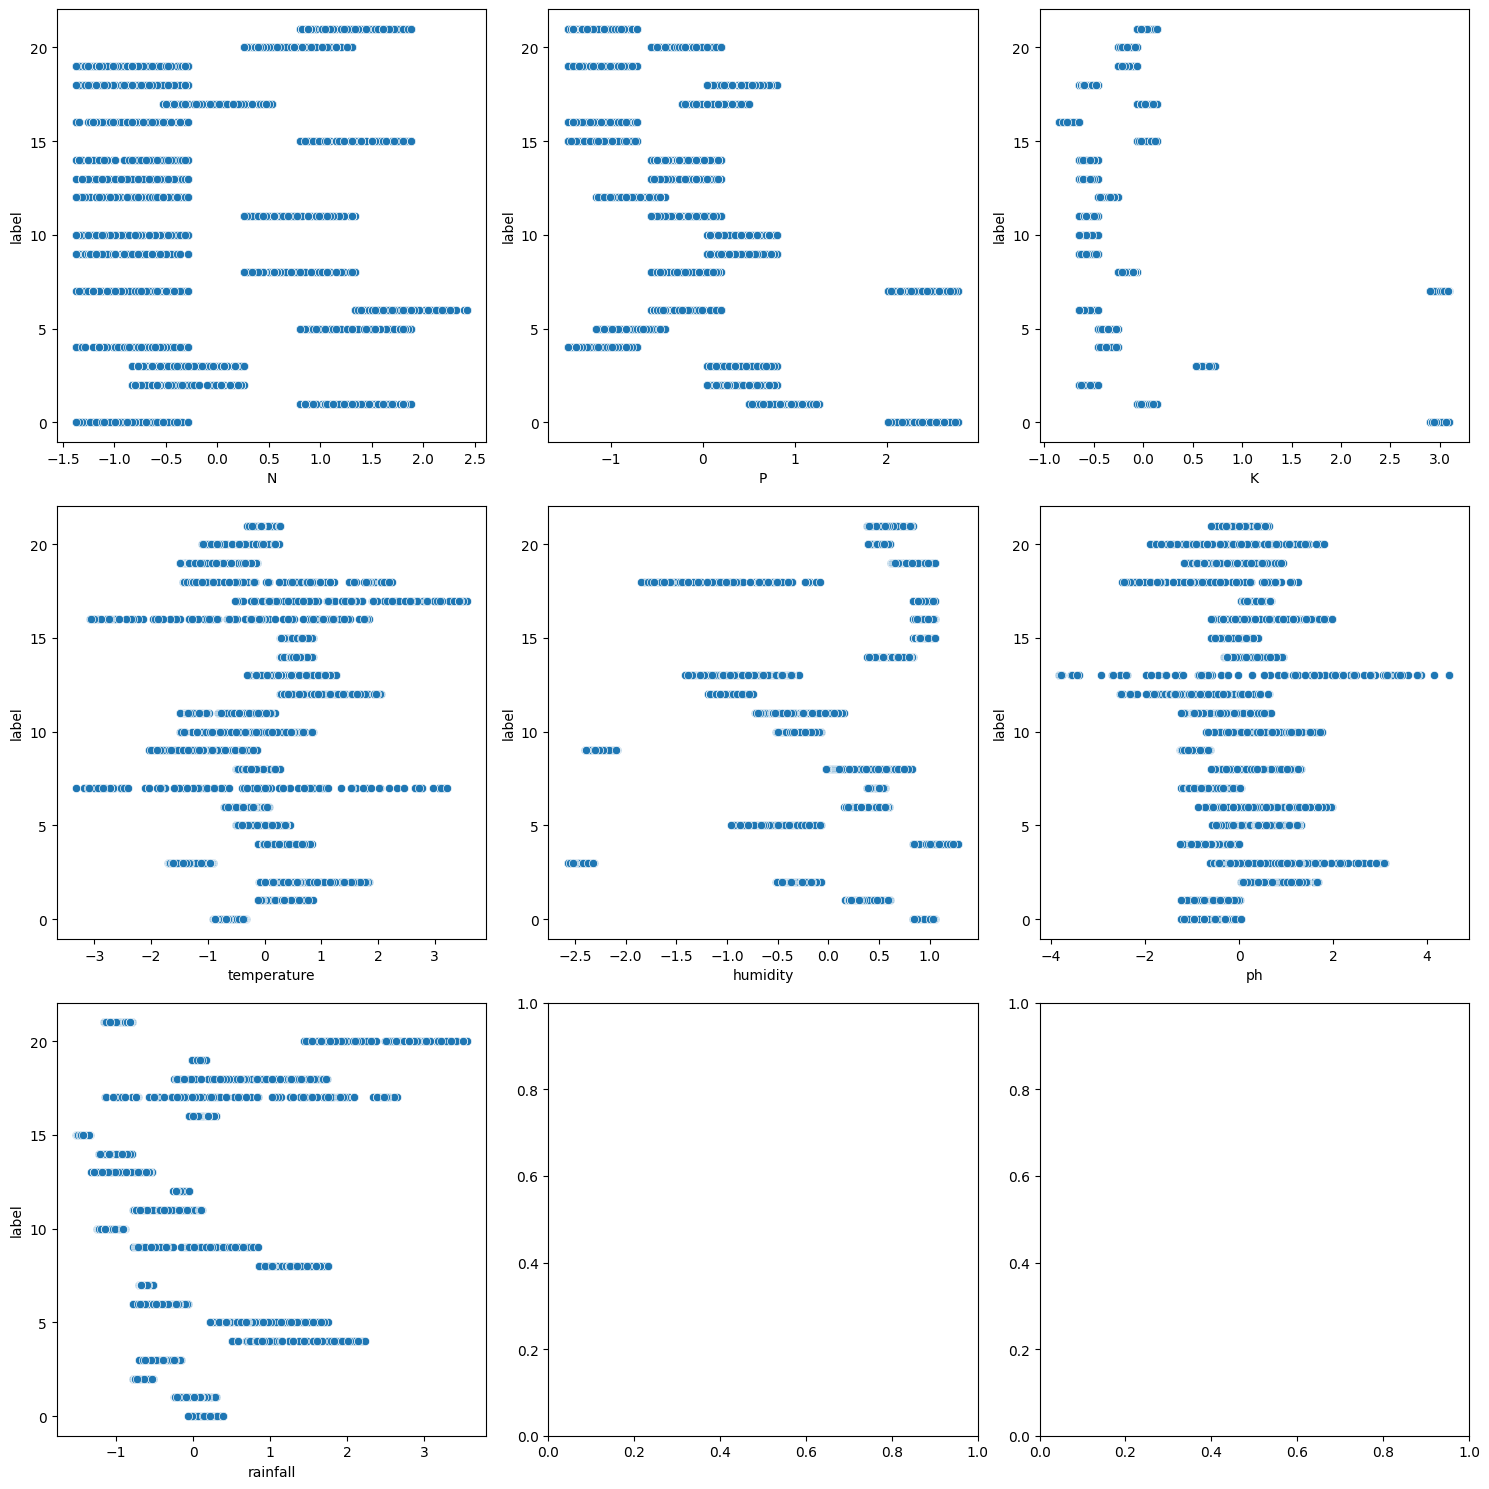

In [17]:
# Ploting scatter plot
import seaborn as sns
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

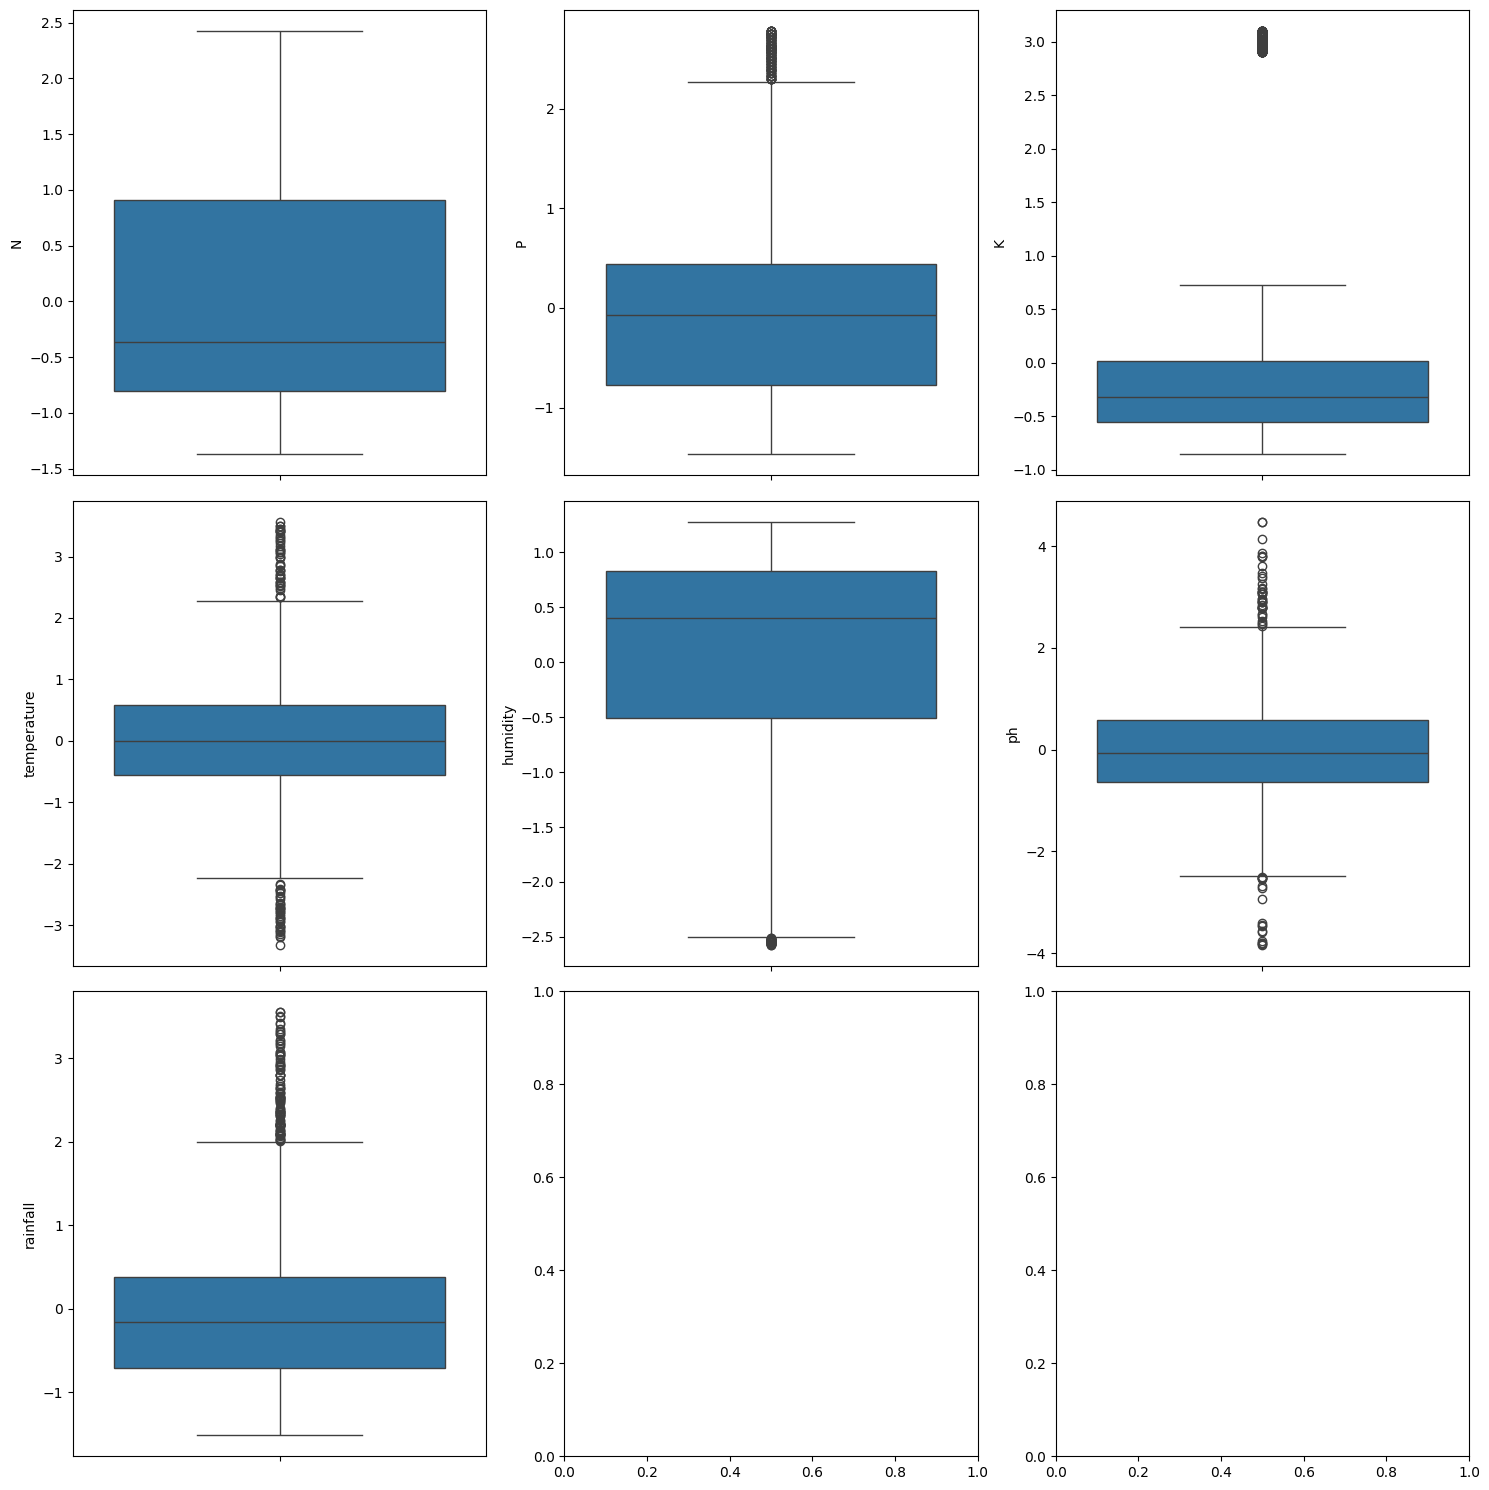

In [18]:
# Finding outliers - boxplot
fig, ax = plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

<Axes: >

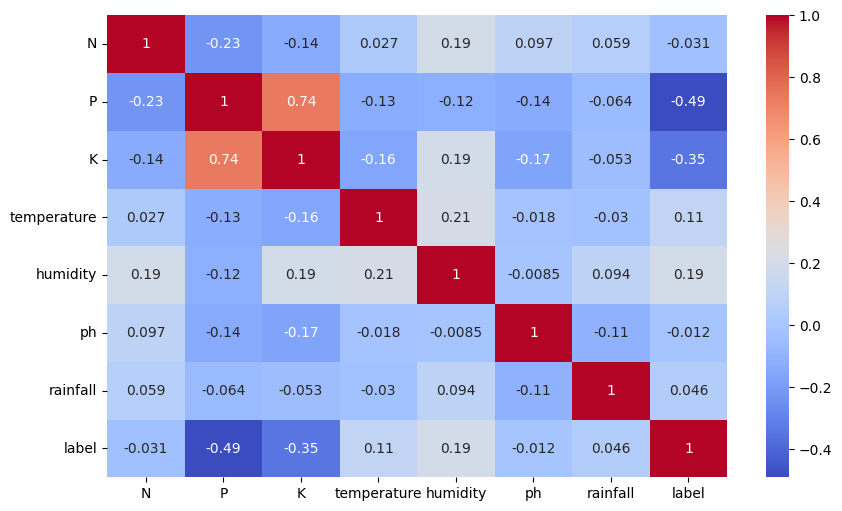

In [19]:
# Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(crop.corr(), annot=True, cmap='coolwarm')


In [20]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])


In [21]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crop['label'] = label_encoder.fit_transform(crop['label'])


In [23]:
#One-Hot Encoding
crop = pd.get_dummies(crop, columns=['label'], drop_first=True)


In [22]:
#missing values
print(crop.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [24]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label_1',
       'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7',
       'label_8', 'label_9', 'label_10', 'label_11', 'label_12', 'label_13',
       'label_14', 'label_15', 'label_16', 'label_17', 'label_18', 'label_19',
       'label_20', 'label_21'],
      dtype='object')

In [25]:
crop['label_1'].value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: label_1, Length: 2200, dtype: bool>

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = scaler.fit_transform(
    crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
)


In [26]:
print(crop.dtypes)


N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label_1           bool
label_2           bool
label_3           bool
label_4           bool
label_5           bool
label_6           bool
label_7           bool
label_8           bool
label_9           bool
label_10          bool
label_11          bool
label_12          bool
label_13          bool
label_14          bool
label_15          bool
label_16          bool
label_17          bool
label_18          bool
label_19          bool
label_20          bool
label_21          bool
dtype: object


In [27]:
print(crop.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label_1        0
label_2        0
label_3        0
label_4        0
label_5        0
label_6        0
label_7        0
label_8        0
label_9        0
label_10       0
label_11       0
label_12       0
label_13       0
label_14       0
label_15       0
label_16       0
label_17       0
label_18       0
label_19       0
label_20       0
label_21       0
dtype: int64


In [28]:
crop.fillna(crop.mean(), inplace=True)  # Replace missing values with column means


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
crop[num_cols] = scaler.fit_transform(crop[num_cols])


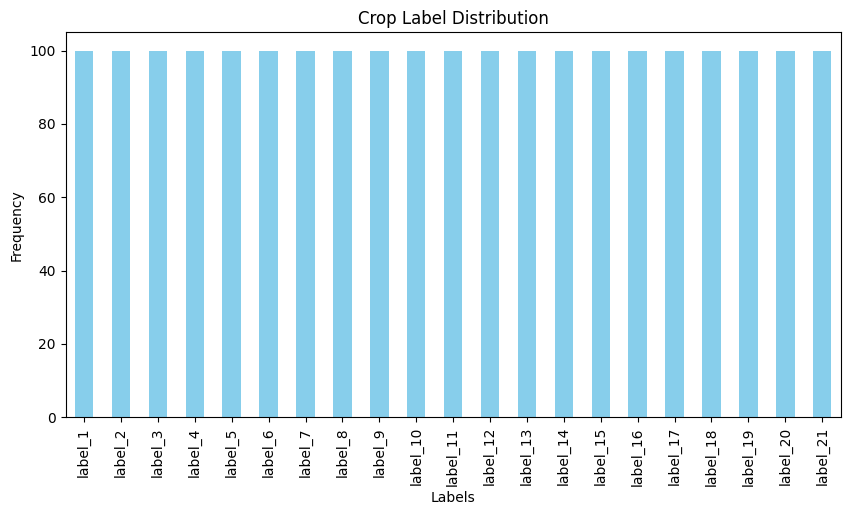

In [30]:
import matplotlib.pyplot as plt

label_counts = crop.iloc[:, 7:].sum()  # Sum occurrences of each label
label_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Crop Label Distribution")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

X = crop.drop(columns=crop.columns[7:])  # Remove labels
y = crop.iloc[:, 7:]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'mungbean': 4,
    'blackgram': 5,
    'lentil': 6,
    'pomegranate': 7,
    'banana': 8,
    'mango': 9,
    'grapes': 10,
    'watermelon': 11,
    'muskmelon': 12,
    'apple': 13,
    'orange': 14,
    'papaya': 15,
    'coconut': 16,
    'cotton': 17,
    'jute': 18,
    'coffee': 19
}

In [ ]:
crop.tail()\


    

,N,P,K,temperature,humidity,ph,rainfall,label_1,label_2,label_3,...,label_12,label_13,label_14,label_15,label_16,label_17,label_18,label_19,label_20,label_21
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2199,1.448109,-1.072300,-0.358420,-0.397667,-0.498020,0.401096,0.682005,False,False,False,...,False,False,False,False,False,False,False,False,False,False
